<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="500" height="250" /> 
    
    
# Homework 4 and 5

- Luis Fernando Márquez Bañuelos
- Luis Eduardo Jiménez del Muro
- Diego Lozoya Morales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats
from fitter import Fitter, get_common_distributions, get_distributions;

plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black'

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

# Homework 4

## Data

In [3]:
data = yf.download("AAPL", start="2001-01-01", end="2025-09-01")["Close"]
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2001-01-02,0.223275
2001-01-03,0.245790
2001-01-04,0.256110
2001-01-05,0.245790
2001-01-08,0.248604
...,...
2025-08-25,227.160004
2025-08-26,229.309998
2025-08-27,230.490005


## Price plot

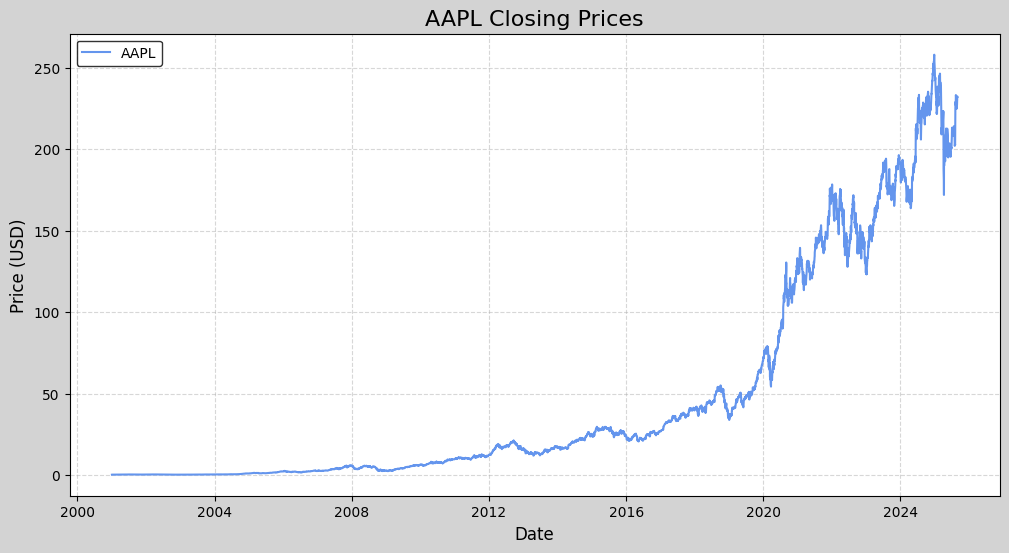

In [4]:
plt.figure()
plt.plot(data, color=colors[0], label="AAPL")
plt.title("AAPL Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

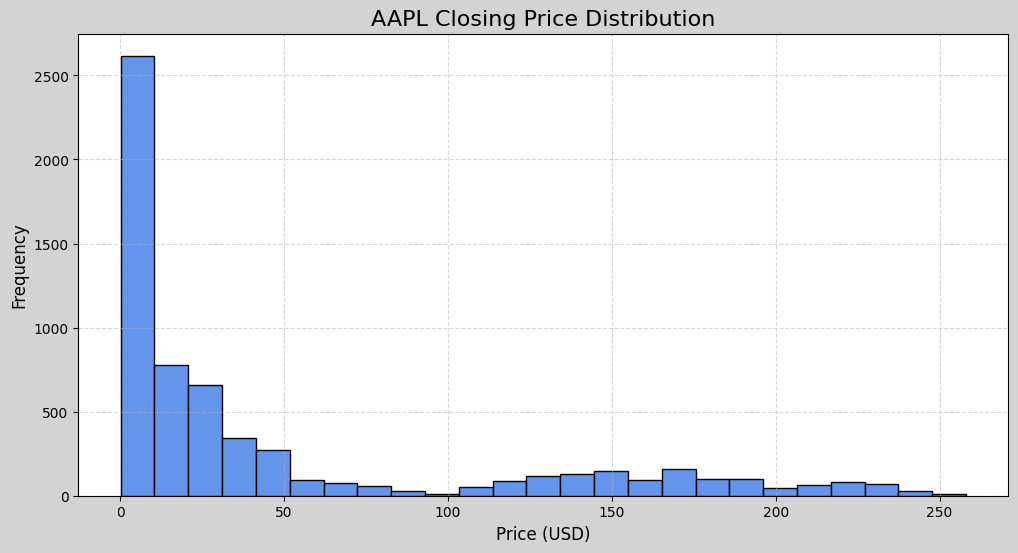

In [5]:
plt.figure()
plt.hist(data.dropna(), bins=25, color=colors[0], edgecolor='black')
plt.title("AAPL Closing Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

## Return plot

In [6]:
data["R"] = data["AAPL"].pct_change().dropna()
data["r"] = np.log(data["AAPL"]) - np.log(data["AAPL"].shift(1))

data = data.dropna()

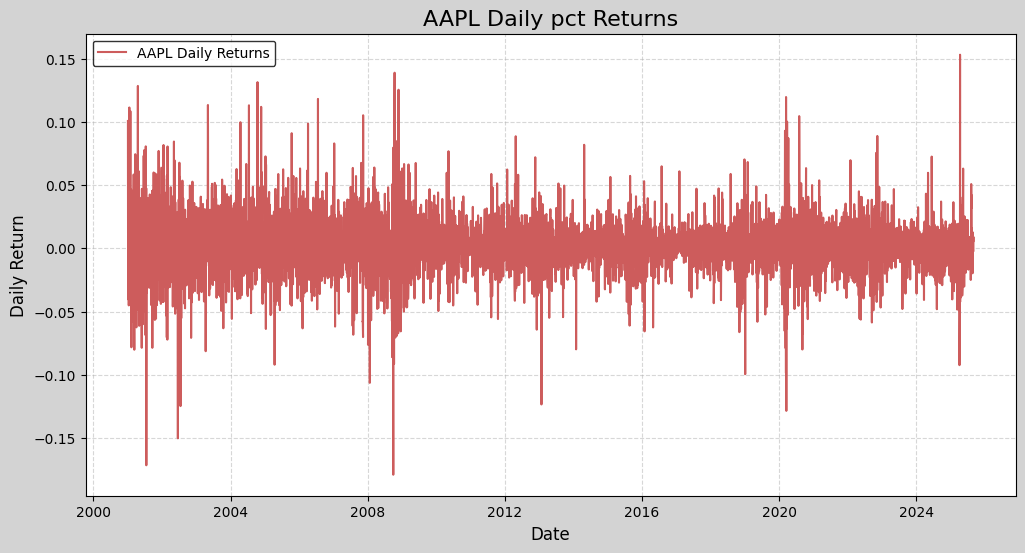

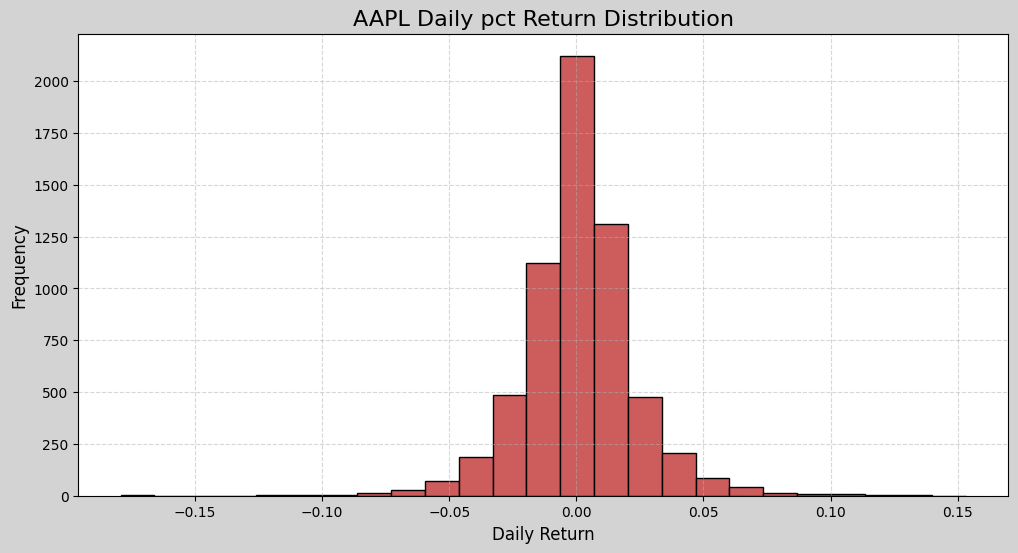

In [7]:
plt.figure()
plt.plot(data["R"], color=colors[1], label="AAPL Daily Returns")
plt.title("AAPL Daily pct Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

plt.figure()
plt.hist(data["R"], bins=25, color=colors[1], edgecolor='black')
plt.title("AAPL Daily pct Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

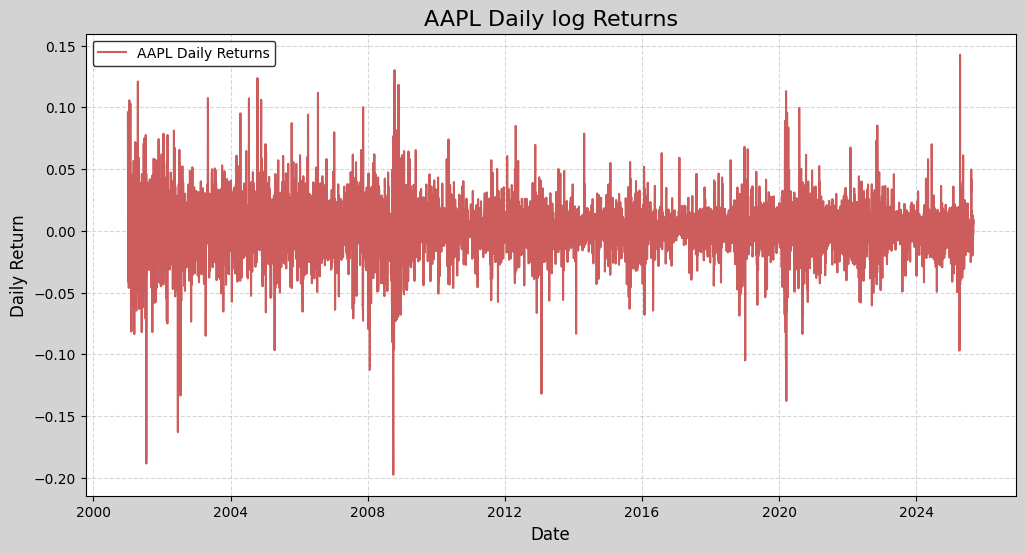

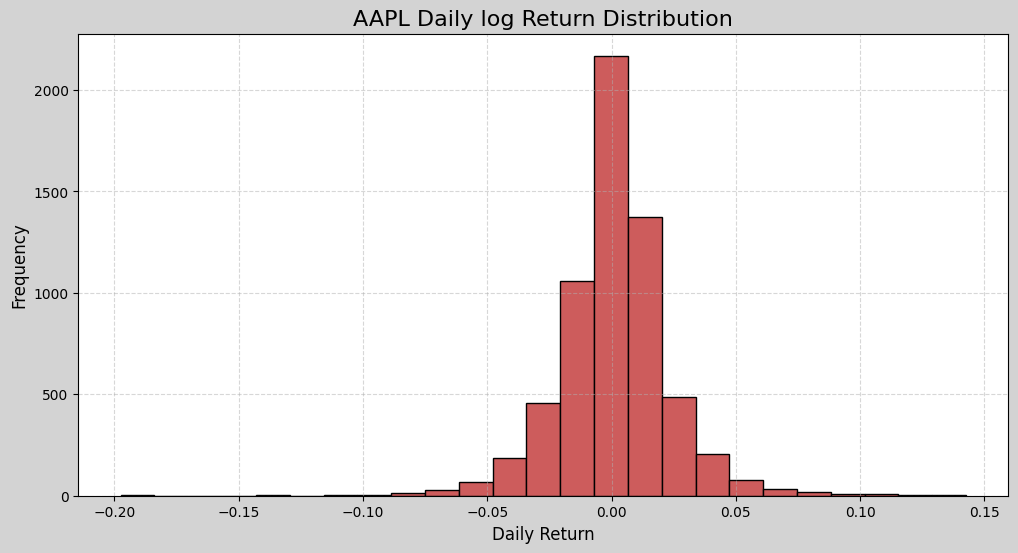

In [8]:
plt.figure()
plt.plot(data["r"], color=colors[1], label="AAPL Daily Returns")
plt.title("AAPL Daily log Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

plt.figure()
plt.hist(data["r"], bins=25, color=colors[1], edgecolor='black')
plt.title("AAPL Daily log Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

## Report

In [9]:
def dqr(data):
    
    cols = pd.DataFrame(list(data.columns.values),
                           columns=['Name'],
                           index=list(data.columns.values))
    dtyp = pd.DataFrame(data.dtypes,columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(),
                                  columns=['N/A value'])
    presval = pd.DataFrame(data.count(),
                                  columns=['Count values'])
    unival = pd.DataFrame(columns=['Unique values'])
    minval = pd.DataFrame(columns=['Min'])
    maxval = pd.DataFrame(columns=['Max'])
    mean =pd.DataFrame(data.mean(), columns=['Mean']) 
    Std =pd.DataFrame(data.std(), columns=['Std']) 
    Var =pd.DataFrame(data.var(), columns=['Var']) 
    median =pd.DataFrame(data.median(), columns=['Median']) 
    
    skewness = pd.DataFrame(data.skew(), columns=['Skewness']) 
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis']) 

    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass
    
    # Juntar todas las tablas
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval).join(mean).join(Std).join(Var).join(median).join(skewness).join(kurtosis)

In [10]:
Report= dqr(data)
Report

,Name,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,Skewness,Kurtosis
AAPL,AAPL,float64,0,6201,5850,0.196932,258.103729,47.462848,66.114534,4371.131637,16.571104,1.488873,0.859393
R,R,float64,0,6201,6173,-0.179195,0.153289,0.001368,0.022265,0.000496,0.000955,0.121267,5.507388
r,r,float64,0,6201,6173,-0.197470,0.142617,0.001120,0.022247,0.000495,0.000954,-0.136251,5.956204


## Pruebas

In [11]:
alfa = 0.05
# Ho: son iguales
# H1: son diferentes

W, p2 = stats.levene(data["r"], data["R"])
if p2 < alfa:
     print("Rechazo Ho, las varianzas son diferentes")
else:
     print("No rechazo Ho, las varianzas son iguales")

No rechazo Ho, las varianzas son iguales


In [12]:
t, p = stats.ttest_ind(data.r, data.R, equal_var=False)

if p < alfa:
     print("Rechazo Ho, las medias son diferentes")
else:
     print("No rechazo Ho, las medias son iguales")

No rechazo Ho, las medias son iguales


In [13]:
k3, p3 = stats.normaltest(data.r)
if p3 < alfa:
     print("Rechazo Ho, no son normales")
else:
     print("No rechazo Ho, son normales")

Rechazo Ho, no son normales


In [14]:
k4, p4 = stats.normaltest(data.R)
if p4 < alfa:
     print("Rechazo Ho, no son normales")
else:
     print("No rechazo Ho, son normales")

Rechazo Ho, no son normales


In [15]:
print(f"LEFT: {data.R.mean() - 0.5 * data.R.var():.4f}")
print(f"RIGHT: {data.r.mean():.4f}")
print(f"diff: {data.R.mean() - 0.5 * data.R.var() - data.r.mean():.4f}")

LEFT: 0.0011
RIGHT: 0.0011
diff: 0.0000


## Fitter

2025-09-16 17:06:22.122 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=4431.833601)
2025-09-16 17:06:22.140 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=130.394001)
2025-09-16 17:06:22.154 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted exponpow distribution with error=1862.821105)
2025-09-16 17:06:22.173 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=3473.252631)
2025-09-16 17:06:22.177 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=3950.308605)
2025-09-16 17:06:22.181 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=400.971525)
2025-09-16 17:06:22.186 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=407.660721)
2025-09-16 17:06:22.224 | INFO     | fitter.fitter:_fit_single_distribu

R
{'cauchy': {'loc': 0.0010160385224720152, 'scale': 0.010124078451062692}}


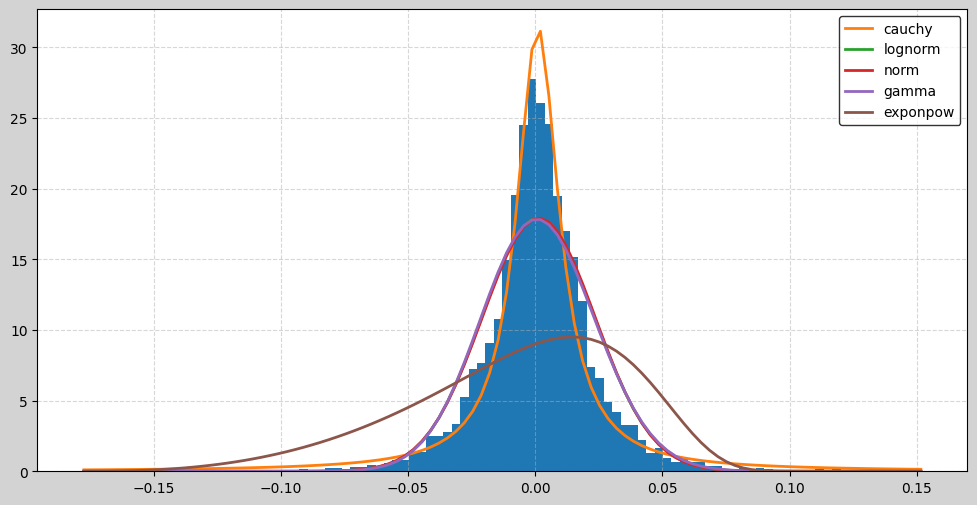

In [16]:
dist = get_common_distributions() #get_distributions()#get_common_distributions() 
f = Fitter(data.R, distributions=dist)
f.fit()
f.summary()
print("R")
print(f.get_best())

El rendimiento porcentual tiene una distribución cauchy, sin embargo, al la normal estar dentro de las primeras 3, podemos asumir que se distribuye normalmente

r
{'cauchy': {'loc': 0.0010658806887325033, 'scale': 0.010115196323852662}}


2025-09-16 17:06:22.365 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=4362.457631)
2025-09-16 17:06:22.369 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=128.517726)
2025-09-16 17:06:22.379 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=388.341476)
2025-09-16 17:06:22.379 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=3809.230288)
2025-09-16 17:06:22.379 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=3506.195014)
2025-09-16 17:06:22.382 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=3878.033028)
2025-09-16 17:06:22.393 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=4776.510089)
2025-09-16 17:06:22.408 | INFO     | fitter.fitter:_fit_single_distribu

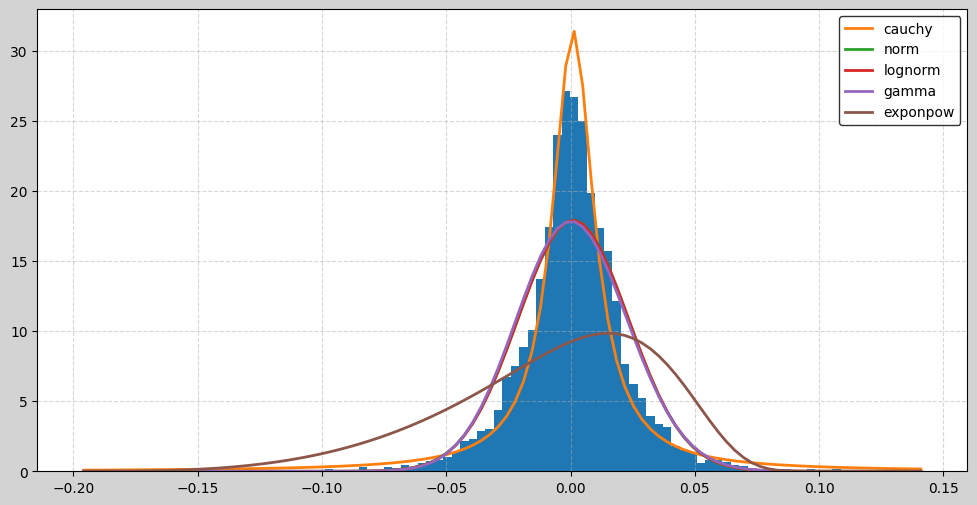

In [17]:
dist= get_common_distributions() #get_distributions()#get_common_distributions() 
f = Fitter(data.r, distributions=dist)
f.fit()
f.summary()
print("r")
print(f.get_best())

El rendimiento logarítmico tambien tiene una distribución cauchy, sin embargo, al la normal estar dentro de las primeras 3, podemos asumir que se distribuye normalmente

## Conclusiones

En primer lugar descargamos los datos historicos de Apple, pero al ver la distribución del histograma del precio, no logramos ver ninguna distribución aparente, por lo que procedimos a calcular los rendimientos. 

Hay dos maneras principales de calcular los rendimientos, de manera porcentual y logarítmica. Ambos histogramas (R y r) tienen una forma aparentemente normal. Para tratar de encontrar diferencias se comparan las medias y varianzas de ambas distribuciones, pero se concluye que son iguales. 

Después se pasan por una prueba de normalidad, en donde se puede ver que ninguno de los dos rendimientos tienen una distribución normal con el nivel de confianza del 95%. 

Finalmente, se  busca encontrar la distribución que más se ajuste a los datos y obtenemos que esta es la distribución Cauchy en mabos casos. No obstante al asemejarse a la distribución normal, se asume normalidad en la distribución de los rendimientos por conveniencia. 

# Homework 5

## Part 1

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(512)

In [19]:
def sim_prices(Sn: float, n_steps: int, mu: float, sigma: float) -> list:
    sim_prices = []
    z = np.random.normal(0, 1, n_steps)

    for i in range(n_steps):
        Sn = Sn * np.exp((mu - 0.5 * sigma**2) + sigma * z[i])
        sim_prices.append(Sn)
    
    return sim_prices

In [20]:
tickers = ['AAPL']
start_date = '2001-01-01'
end_date = '2025-09-01'

data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Close'][tickers]

In [21]:
rt = data.pct_change().dropna()
mu = rt.mean().values
sigma = rt.std().values

z = np.random.normal(0, 1, len(data)-1)
Sn_1 = data.iloc[0].values

prices = sim_prices(Sn_1, len(data)-1, mu, sigma)

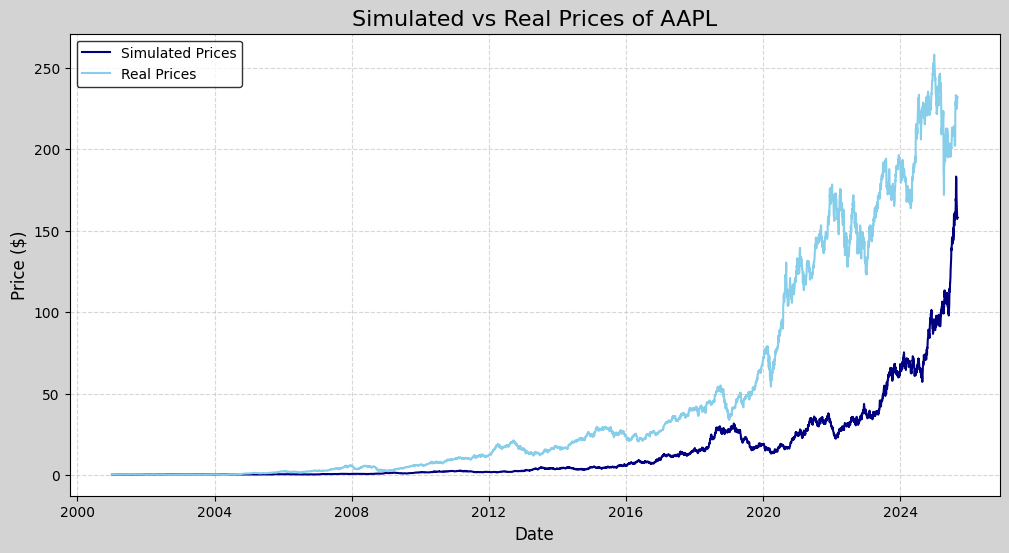

In [22]:
plt.plot(data.index[1:], prices, color = 'navy', label = 'Simulated Prices')
plt.plot(data.index[1:], data.values[1:], color = 'skyblue', label = 'Real Prices')
plt.title('Simulated vs Real Prices of AAPL')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Part 2

In [23]:
prices_df = pd.DataFrame(prices, index=data.index[1:], columns=['AAPL'])
prices_df

,AAPL
Date,
2001-01-03,0.224716
2001-01-04,0.223286
2001-01-05,0.214793
2001-01-08,0.212721
2001-01-09,0.214425
...,...
2025-08-25,159.113442
2025-08-26,159.224208
2025-08-27,157.229801


## Visualize Returns

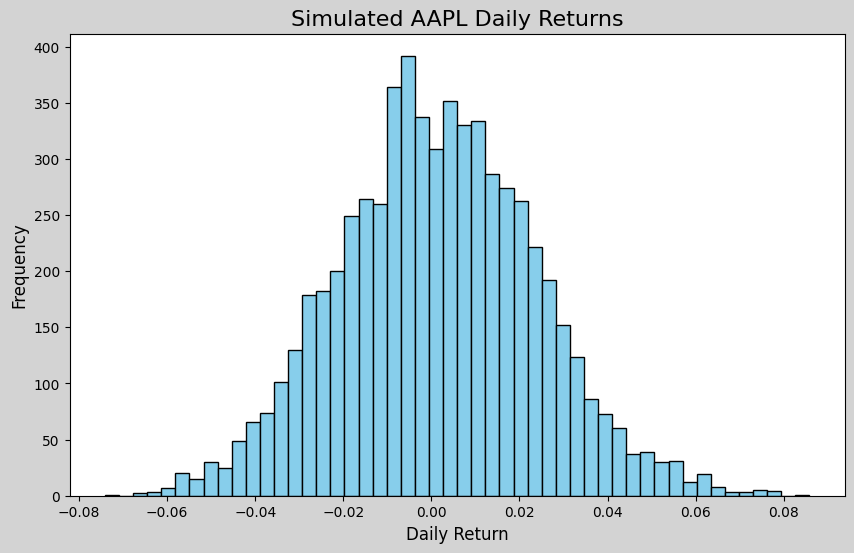

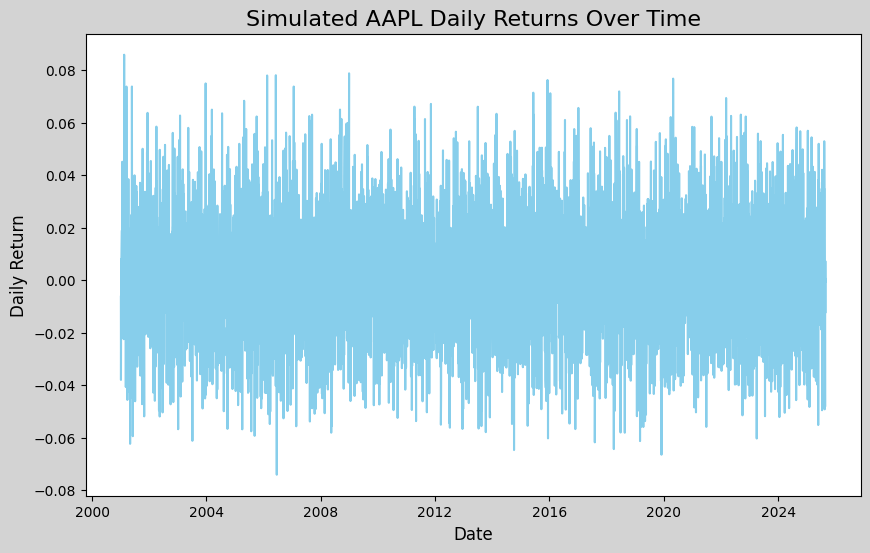

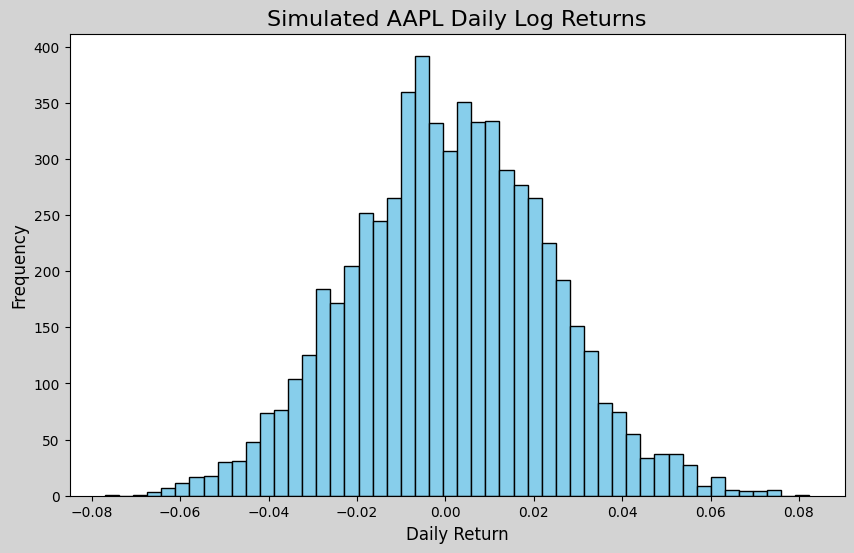

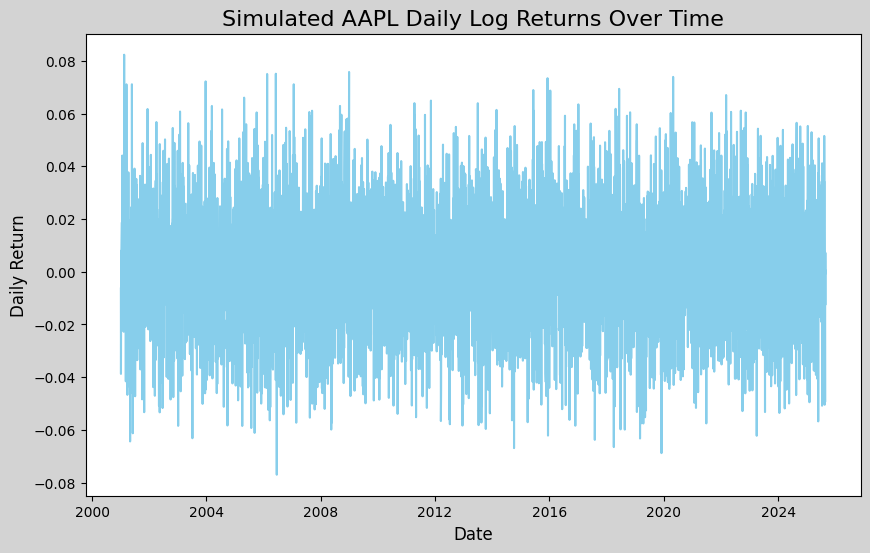

In [24]:
R = prices_df.pct_change().dropna()
r = (np.log(prices_df) - np.log(prices_df.shift(1))).dropna()

strings = ['Returns', 'Log Returns']
rets = [R, r]

for i, ret in enumerate(rets):
    plt.figure(figsize=(10, 6))
    plt.hist(ret, bins=50, edgecolor='black', color = 'skyblue')
    plt.title(f'Simulated {tickers[0]} Daily {strings[i]}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(ret, c = 'skyblue')
    plt.title(f'Simulated {tickers[0]} Daily {strings[i]} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.grid()
    plt.show()

## Returns Statistics

In [25]:
def dqr(data):
    
    cols = pd.DataFrame(list(data.columns.values),
                           columns=['Name'],
                           index=list(data.columns.values))
    dtyp = pd.DataFrame(data.dtypes,columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(),
                                  columns=['N/A value'])
    presval = pd.DataFrame(data.count(),
                                  columns=['Count values'])
    unival = pd.DataFrame(columns=['Unique values'])
    minval = pd.DataFrame(columns=['Min'])
    maxval = pd.DataFrame(columns=['Max'])
    mean =pd.DataFrame(data.mean(), columns=['Mean']) 
    Std =pd.DataFrame(data.std(), columns=['Std']) 
    Var =pd.DataFrame(data.var(), columns=['Var']) 
    median =pd.DataFrame(data.median(), columns=['Median']) 
    
    skewness = pd.DataFrame(data.skew(), columns=['Skewness']) 
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis']) 

    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass
    
    # Juntar todas las tablas
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval).join(mean).join(Std).join(Var).join(median).join(skewness).join(kurtosis)

In [26]:
prices_df['Returns'] = prices_df.pct_change()
prices_df['Log Returns'] = np.log(prices_df[tickers[0]]) - np.log(prices_df[tickers[0]].shift(1))
prices_df = prices_df.dropna()

Report = dqr(prices_df)
Report

,Name,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,Skewness,Kurtosis
AAPL,AAPL,float64,0,6200,6200,0.212721,183.277257,14.919419,25.226042,636.353192,3.407698,2.802020,9.396743
Returns,Returns,float64,0,6200,6200,-0.074147,0.085849,0.001310,0.022462,0.000505,0.001053,0.101712,0.033966
Log Returns,Log Returns,float64,0,6200,6200,-0.077039,0.082362,0.001058,0.022421,0.000503,0.001052,0.034011,0.009070


In [27]:
alfa = 0.05
#Ho: son igual
#Ha: No son iguales

W, p2 = stats.levene(prices_df['Returns'], prices_df['Log Returns'])

if p2 < alfa:
    print('Ho puede ser rechazada (No son iguales)')

else:
    print('Ho NO puede ser rechazada (Son iguales)')

Ho NO puede ser rechazada (Son iguales)


In [28]:
alfa = 0.05
#Ho: son igual
#Ha: No son iguales

t, p = stats.ttest_ind(prices_df['Returns'], prices_df['Log Returns'], equal_var=True)

if p < alfa:
    print('Ho puede ser rechazada (No son iguales)')

else:
    print('Ho NO puede ser rechazada (Son iguales)')

Ho NO puede ser rechazada (Son iguales)


In [29]:
print('LEFT: ', prices_df['Returns'].mean() - 0.5*prices_df['Returns'].var())
print('RIGHT: ', prices_df['Log Returns'].mean())
print('DIFFERENCE: ', (prices_df['Returns'].mean() - 0.5*prices_df['Returns'].var()) - prices_df['Log Returns'].mean())

LEFT:  0.001057592783898792
RIGHT:  0.0010576274319273116
DIFFERENCE:  -3.464802851961893e-08


In [30]:
k3, p3 = stats.normaltest(prices_df['Returns'])

if p3 < alfa:
    print('Ho puede ser rechazada (No son normales)')
else:
    print('Ho NO puede ser rechazada (Son normales)')

Ho puede ser rechazada (No son normales)


r
{'norm': {'loc': 0.0010576274319273116, 'scale': 0.022419215067391474}}


2025-09-16 17:06:22.979 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=5795.674785)
2025-09-16 17:06:22.988 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=97.414133)
2025-09-16 17:06:22.992 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=3993.437956)
2025-09-16 17:06:22.996 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=723.251526)
2025-09-16 17:06:22.998 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=2067.108911)
2025-09-16 17:06:22.998 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=4070.178505)
2025-09-16 17:06:23.000 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=98.690354)
2025-09-16 17:06:23.027 | INFO     | fitter.fitter:_fit_single_distributi

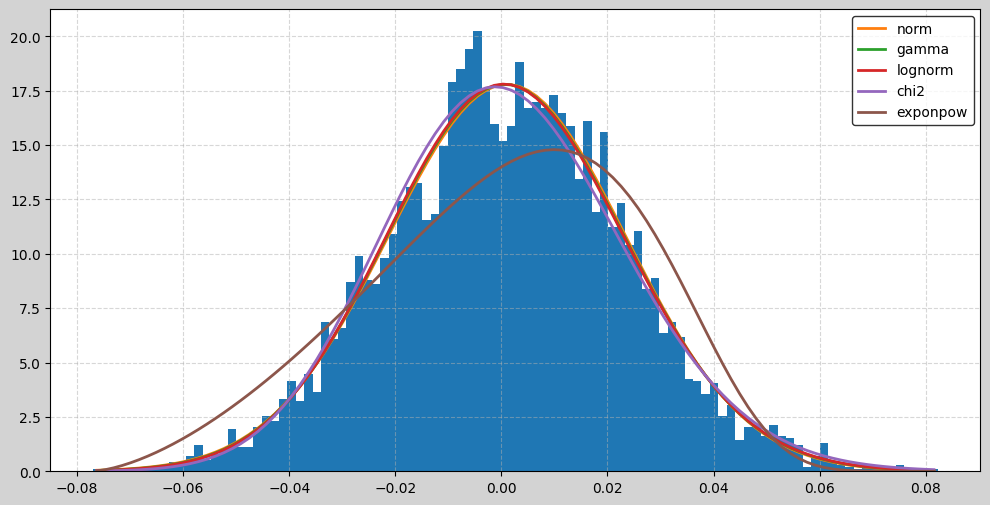

In [31]:
from fitter import Fitter, get_common_distributions

dist= get_common_distributions()
f = Fitter(prices_df['Log Returns'],distributions=dist)
f.fit()
f.summary()
print ("r")
print(f.get_best())  

## Conclusiones

Primeramente se realizó la simulación de los precios, y en la gráfica comparativa se observo que a pesar que si tienen un comportamiento parecido, no son iguales. Principalemente notamos que los precios simulados no siguen la volatilidad de los reales, pues suben menos y bajan menos en comparación a los reales. Esto hace que al final, notemos que el precio real está mucho más arriba que el simulado.

Posteriormente se realizaron las pruebas estadísticas para revisar  si las varianzas y valores esperados de los rendimientos y rendimientos logarítmicos. En estas pruebas se comprueba que en efecto las varianzas y rendimientos son estadísticamente iguales. Además se demostró una propiedad, donde vimos que el lado izquierdo y derecho de la ecuación es prácticamente el mismo.

Por último se realizó la prueba de normalidad a los rendimientos logarítmicos y vimos que estadísticamente no siguen una distribución normal. No obstante, utilizando fitter, pudimos ver que la distribució que mejor se ajusta si es la normal.